# Pymaceuticals Inc.
---

### Analysis

- It appears that mice with Ramicane had the most success with getting the tumors to shrink. We can also see that a mouse's size influences the size of its tumors. We can also assume that the study is fair as there is a near equal distribution of Male vs Female mice, and a large quantity of timepoints for all drug regimens.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(study_results, mouse_metadata, how='outer')

# Display the data table for preview
mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [20]:
# Checking the number of mice.
mouse_results = mouse_results.rename(columns={'Mouse ID': 'Mouse_ID'})
count =  mouse_results.Mouse_ID.nunique()
count

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_results.loc[mouse_results.duplicated(['Mouse_ID', 'Timepoint']), 'Mouse_ID'].unique()
print(duplicate_mouse_id)

['g989']


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = mouse_results.loc[mouse_results['Mouse_ID'] == 'g989']
g989_data

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_results.loc[mouse_results['Mouse_ID'] != 'g989']
clean_data

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [24]:
# Checking the number of mice in the clean DataFrame.
count =  clean_data.Mouse_ID.nunique()
count

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_volume = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
print(mean_volume)

median_volume = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
print(median_volume)

variance_volume = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
print(variance_volume)

std_dev_volume = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
print(std_dev_volume)

sem_volume = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
print(sem_volume)

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean': mean_volume,
    'Median': median_volume,
    'Variance': variance_volume,
    'Standard Deviation': std_dev_volume,
    'SEM': sem_volume
})
summary_stats


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

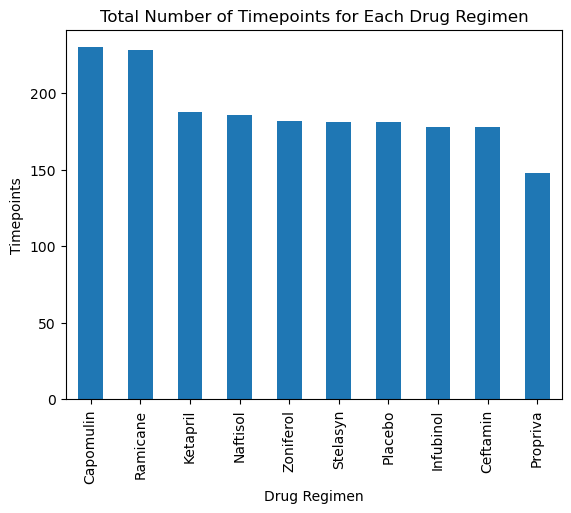

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_counts = clean_data['Drug Regimen'].value_counts()

# Generating bar plot
timepoint_counts.plot(kind='bar')

# Set the plot title and labels
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')

# Display the plot
plt.show()


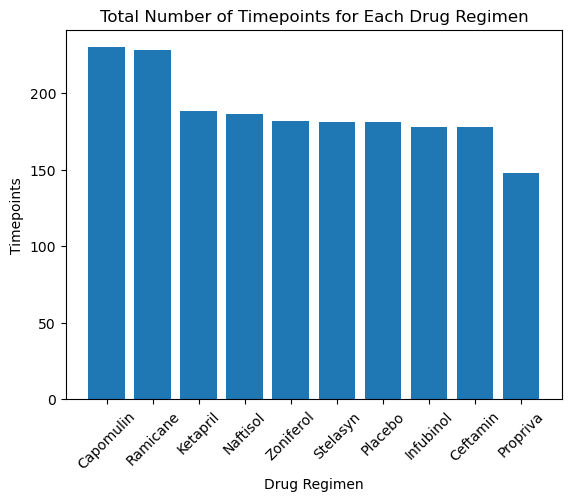

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_counts = clean_data['Drug Regimen'].value_counts()

# Getting drug regimens and corresponding timepoint counts
drug_regimens = timepoint_counts.index
counts = timepoint_counts.values

# Generating bar plot
plt.bar(drug_regimens, counts)

# Setting plot title and labels
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')

# Rotating x labels
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


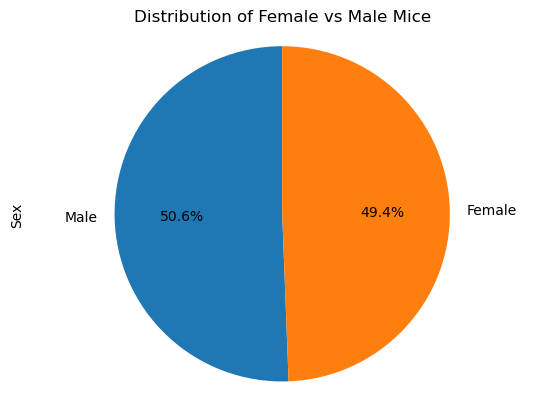

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = mouse_results['Sex'].value_counts()

# Generating pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Female vs Male Mice')

plt.axis('equal')

# Display the plot
plt.show()


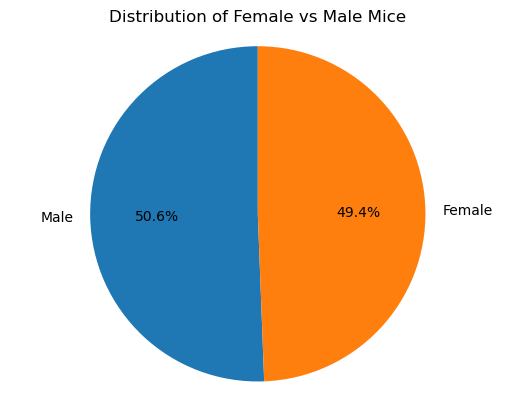

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = mouse_results['Sex'].value_counts()

# Get the labels and counts for the pie plot
labels = gender_counts.index
counts = gender_counts.values

# Generating pie plot
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Female vs Male Mice')

plt.axis('equal')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

subset_data = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

final_timepoints = subset_data.groupby('Mouse_ID')['Timepoint'].max()

final_tumor_volume = pd.merge(final_timepoints, subset_data, on=['Mouse_ID', 'Timepoint'])

# Display the final tumor volume of each mouse as a DataFrame
final_tumor_volume_df = pd.DataFrame(final_tumor_volume, columns=['Mouse_ID', 'Drug Regimen', 'Tumor Volume (mm3)'])
print(final_tumor_volume_df)

   Mouse_ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [74]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Empty dictionary to store the potential outliers for each drug regimen
potential_outliers = {}

# Iterate over each drug regimen
for regimen in treatment_regimens:
    
    subset_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]
    
    tumor_volumes = subset_data['Tumor Volume (mm3)']
    
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = subset_data[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    potential_outliers[regimen] = outliers

# Displaying potential outliers for each drug regimen
for regimen, outliers in potential_outliers.items():
    print(f"Potential outliers for {regimen}:")
    print(outliers[['Mouse_ID', 'Tumor Volume (mm3)']])
    print()

Potential outliers for Capomulin:
Empty DataFrame
Columns: [Mouse_ID, Tumor Volume (mm3)]
Index: []

Potential outliers for Ramicane:
Empty DataFrame
Columns: [Mouse_ID, Tumor Volume (mm3)]
Index: []

Potential outliers for Infubinol:
   Mouse_ID  Tumor Volume (mm3)
15     c326           36.321346

Potential outliers for Ceftamin:
Empty DataFrame
Columns: [Mouse_ID, Tumor Volume (mm3)]
Index: []



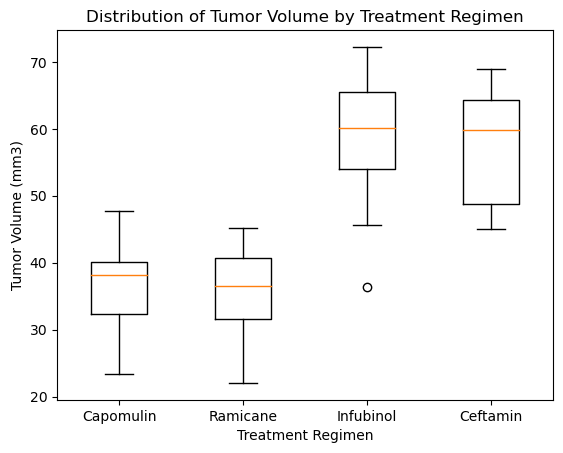

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumes = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].values
                 for regimen in treatment_regimens]

# Generate the box plot using pyplot
plt.boxplot(tumor_volumes)

# Set the x-axis tick labels
plt.xticks(range(1, len(treatment_regimens) + 1), treatment_regimens)

# Set the plot title
plt.title('Distribution of Tumor Volume by Treatment Regimen')

# Set the x-axis label
plt.xlabel('Treatment Regimen')

# Set the y-axis label
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

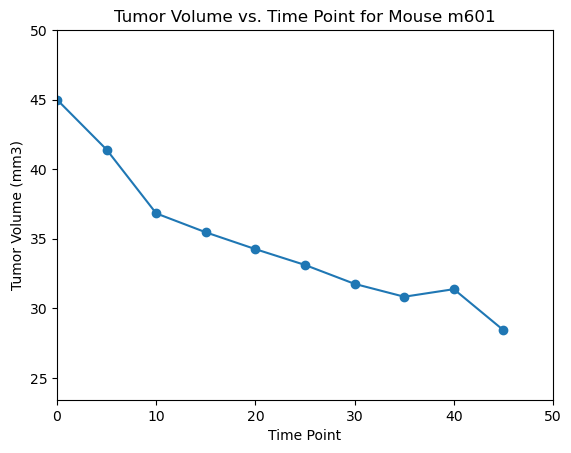

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = 'm601'

# Filter the data for the selected mouse treated with Capomulin
mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse_ID'] == mouse_id)]

# Creating plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Setting labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id}')

plt.xlabel('Time Point')

plt.ylabel('Tumor Volume (mm3)')

#resizing
plt.xlim(0, max(mouse_data['Timepoint']) + 5)
plt.ylim(min(mouse_data['Tumor Volume (mm3)']) - 5, max(mouse_data['Tumor Volume (mm3)']) + 5)

plt.show()


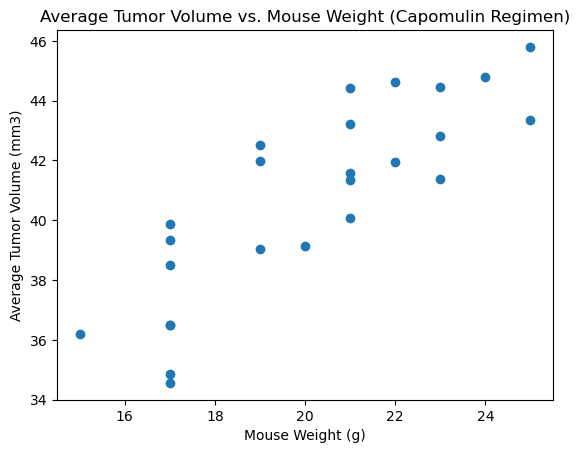

In [81]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
average_volume = capomulin_data.groupby('Mouse_ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse_ID')['Weight (g)'].mean()

# Create the scatter plot
plt.scatter(mouse_weight, average_volume)

# Set the plot title
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')

# Set the x-axis label
plt.xlabel('Mouse Weight (g)')

# Set the y-axis label
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

Correlation coefficient: 0.8419363424694719


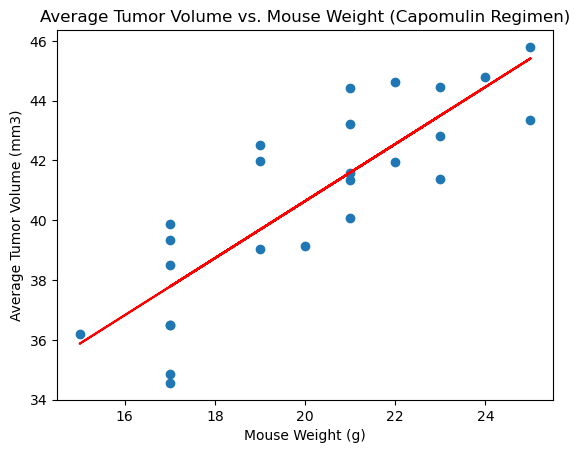

In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# correlation coefficient
correlation = st.pearsonr(mouse_weight, average_volume)[0]
print(f"Correlation coefficient: {correlation}")

# linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, average_volume)

# scatter plot
plt.scatter(mouse_weight, average_volume)

regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight, regress_values, color='red')

# Setting labels
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')

plt.xlabel('Mouse Weight (g)')

plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
